<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<h3>TITLE : Auto Regressive Integrated Moving Average</h3> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div><h4>
Exercise No. 1</h4> <div style="text-align:Right">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Reg No : 23MDT0047 </div>
Date : April 25, 2024
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AIM : To determine the forecasting values using ARIMA &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Description : Electric Production from 01/01/1985 to 01/01/2018.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div> 
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It consists of two columns - Date and Value.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from sklearn.metrics import r2_score

In [2]:
data = pd.read_excel("ELECTRIC_PRODUCTION.xlsx")
data.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-01-02,70.6720
2,1985-01-03,62.4502
3,1985-01-04,57.4714
4,1985-01-05,55.3151


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.columns = ['EnergyProduction']

<Axes: title={'center': 'Energy Production'}, xlabel='Date'>

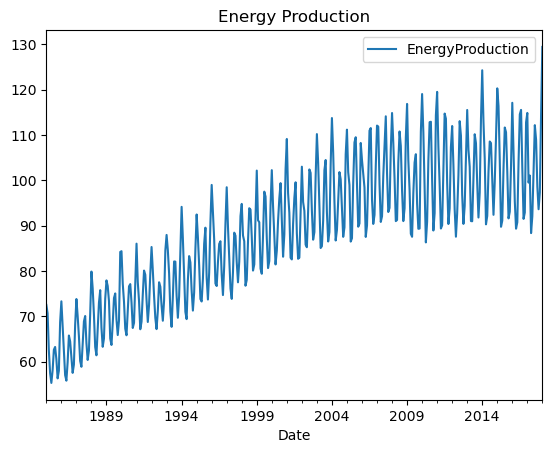

In [5]:
data.plot(title="Energy Production")

In [6]:
result = seasonal_decompose(data, model='multiplicative')

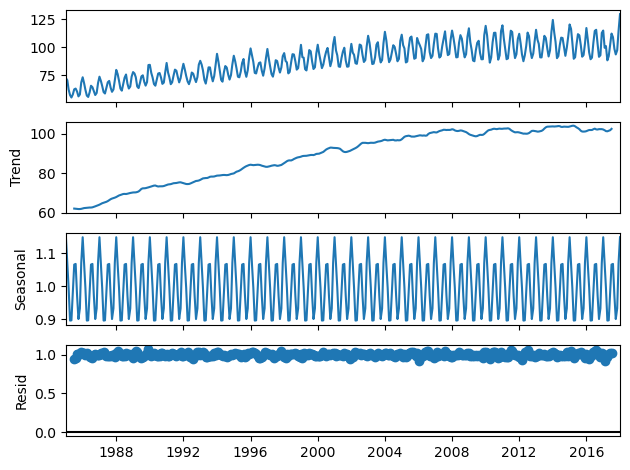

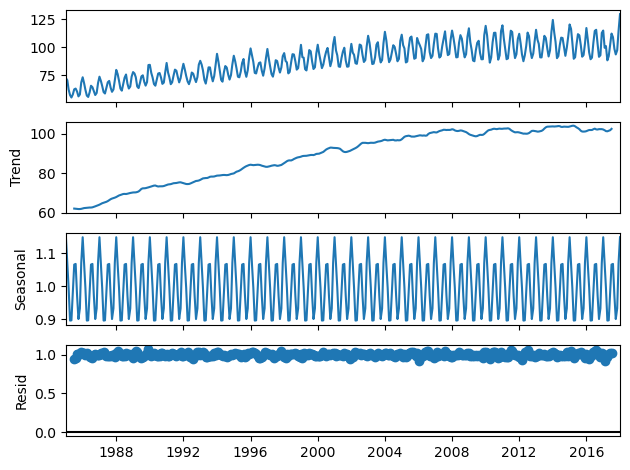

In [7]:
result.plot()

- indicating the presence of seasonal trend

In [8]:
stepwise_model = pm.auto_arima(data, start_p=0, start_q=0,
                           max_p=4, max_q=4, m=12,
                           start_P=0,start_Q=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1972.417, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1836.547, Time=0.31 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1835.973, Time=1.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1923.364, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1835.172, Time=0.77 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1814.635, Time=1.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1823.212, Time=0.83 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1852.611, Time=1.12 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=1.26 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=1.24 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1773.643, Time=0.89 sec
 ARIMA(1,1,1)(1,1,1

ARIMA(1,1,1)(2,1,2) is suitable model as it has the minimum AIC.

In [9]:
print(stepwise_model.aic())

1770.226232255881


In [10]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [11]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [12]:
future_forecast = stepwise_model.predict(n_periods=13)

In [13]:
future_forecast

2017-01-01    120.956892
2017-02-01    109.877816
2017-03-01    100.378697
2017-04-01     90.564855
2017-05-01     92.174661
2017-06-01    103.285566
2017-07-01    112.980288
2017-08-01    112.230949
2017-09-01    100.957125
2017-10-01     91.922619
2017-11-01     95.727614
2017-12-01    111.204931
2018-01-01    120.321208
Freq: MS, dtype: float64

In [14]:
future_forecast1 = pd.DataFrame(future_forecast,
                index = test.index,columns=['Prediction'])

<Axes: xlabel='Date'>

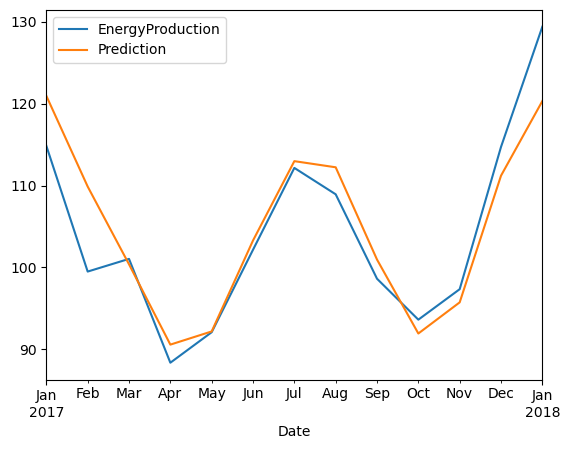

In [15]:
pd.concat([test,future_forecast1],axis=1).plot()

In [16]:
r2_score(test, future_forecast)

0.8284906698530003

Score of 0.828 indicates that the model explains approximately 82.8% of the variance in the target variable around its mean. This suggests that the model fits the data quite well, with a large portion of the variance being explained by the model.